In [ ]:
!pip install accelerate -U
!accelerate>=0.20.1
! pip install torch
!pip install -q datasets transformers
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import torch

# Load the pre-trained ViT model and feature extractor
imodel = ViTForImageClassification.from_pretrained("/content/drive/MyDrive/ML_model/2")
feature_extractor = ViTFeatureExtractor.from_pretrained("/content/drive/MyDrive/ML_model/2")

def predict(img):
  # Preprocess the image
  inputs = feature_extractor(images=img, return_tensors="pt")

  # Perform inference
  with torch.no_grad():
      logits = imodel(**inputs).logits

  # Get the predicted class
  return torch.argmax(logits, dim=1).item()

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [5]:
id2label={0: 'অর্জুন',
 1: 'আম',
 2: 'একাশি ',
 3: 'কড়ই ',
 4: 'কদম ',
 5: 'কাঁঠাল ',
 6: 'জাম',
 7: 'দেবদারু ',
 8: 'পেয়ারা',
 9: 'বকুল ',
 10: 'বরই ',
 11: 'বেল',
 12: 'মেহগুনি ',
 13: 'লিচু',
 14: 'লেবু',
 15: 'শিমুল '}

Predicted class: আম


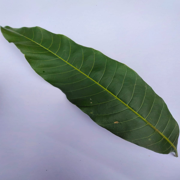

Predicted class: পেয়ারা


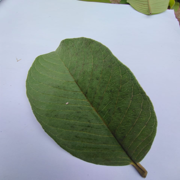

Predicted class: আম


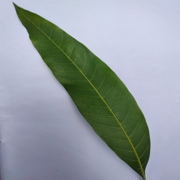

In [8]:
from PIL import Image
import requests
PATH = '/content/new'
for img in os.listdir(PATH):
  image=Image.open(os.path.join(PATH,img))
  print("Predicted class:", id2label[predict(image)])
  display(image.resize((180,180)))